In [1]:
import tspice
print(tspice.__version__)

/home/deivyastro/TSPICE_package/src/tspice/tidal_signal.py:4: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.5)
  import scipy.special as sps


0.0.1


In [2]:
#Initialize the kernels --> The first time takes a bit longer to download the kernels
tspice.initialize()

TSPICE initialized successfully. Kernels loaded from: /home/deivyastro/TSPICE_package/src/tspice/data/meta_kernel


In [3]:
earth = tspice.Body('Earth')

I'm using as example, the signal around (14 days before and after) the seismic event in Paratebueno, Colombia ($M_{w}=6.3$):

In [4]:
#Coordinates of the station in radians
loc = dict(lat = 4.49,
           lon = -73.14,
           depth = 9)

#Magnitude
#Mw = 6.3

#Dictionary with the start, stop, and step data
date = dict(start = '2025-05-25 13:08:05',
            stop = '2025-06-22 13:08:05',
            step = '1h',
            time_frame = 'UTC')

#List of bodies to consider for tidal calculations
bodylist = ['Moon', 'Sun', 'Mercury', 'Venus', 'Mars', 'Jupiter']

In [5]:
#Get the tidal potential due just to the Moon
Vgtid, et_utc = earth.tgp_one_body('Moon', loc_sta=loc, dates=date, nmax=6, time_array=True)

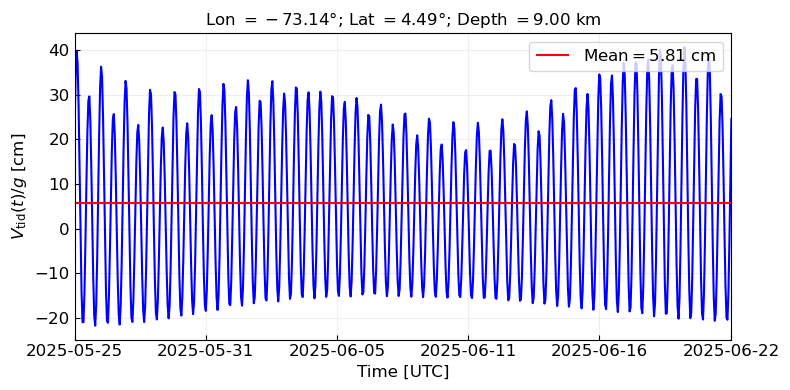

In [ ]:
#Plotting the signal
tspice.plot_one_signal(et_utc, Vgtid*100, loc=loc, colors=['blue','red'], mean_value=True)

In [6]:
from datetime import datetime
import spiceypy as spy

In [7]:
#Convert ET to UTC
utc_times = spy.et2utc(et_utc, format_str='ISOC', prec=2)	#Return an array with the date in UTC strings
utc_times = [datetime.fromisoformat(utc) for utc in utc_times]	#Return datatime objects

In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

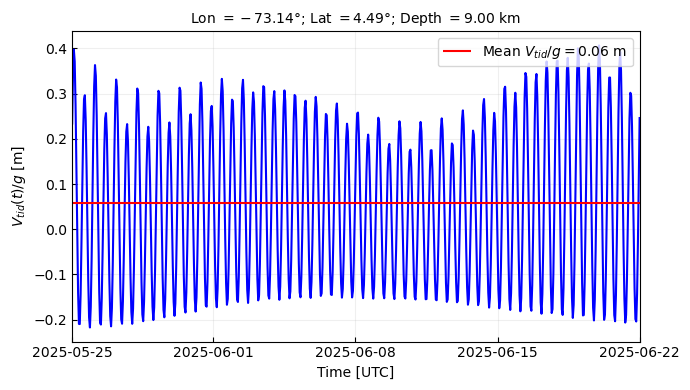

In [9]:
#Plot of Vtid/g in time
fig, ax = plt.subplots(figsize=(7,4))

#Total signal
ax.plot(utc_times, Vgtid, color='blue')
ax.hlines(Vmean, utc_times[0], utc_times[-1], color='red', label=r'Mean $V_{tid}/g=%.2f$ m'%(Vmean))
ax.set_xlabel('Time [UTC]', fontsize=10)
ax.set_ylabel(r'$V_{tid}(t)/g$ [m]', fontsize=10)
ax.set_title('Lon $= %.2f$°; Lat $= %.2f$°; Depth $= %.2f$ km'%(loc['lon'], loc['lat'], loc['depth']), fontsize=10)
ax.legend(fontsize=10, loc='upper right')

ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')

#Taking 5 equally spaced times
ticks = np.linspace(0, len(utc_times)-1, 5, dtype=int)
ax.set_xticks([utc_times[i] for i in ticks])

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

ax.grid(alpha=0.2)
ax.margins(x=0, y=0.05)

#fig.suptitle(f'Figura 4. Earth Tides during a lunar month ($n = %s $)'%nmax)
fig.tight_layout();

In [10]:
#To get the total tidal signal due to all the bodies in the list
Vgtid_array, et_utc = earth.tgp_many_bodies(bodylist, loc_sta=loc, dates=date, nmax=6, body_signal=True)
Vgtid_total = Vgtid_array.sum(axis=1)	#Sum the contribution of each body
Vmean_total = Vgtid_total.mean()

Moon contribution calculated!
Sun contribution calculated!
Mercury contribution calculated!
Venus contribution calculated!
Mars contribution calculated!
Jupiter contribution calculated!


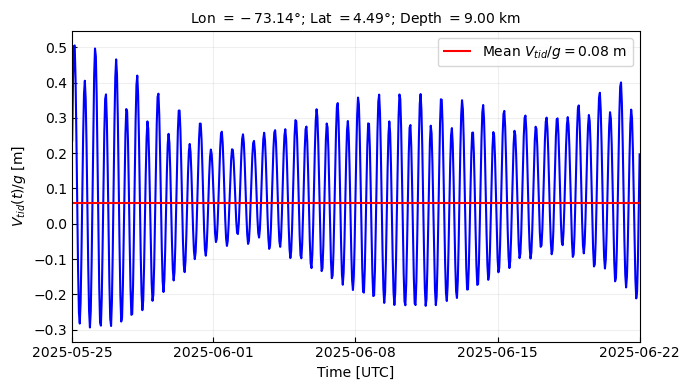

In [11]:
#Plot of Vtid/g in time
fig, ax = plt.subplots(figsize=(7,4))

#Total signal
ax.plot(utc_times, Vgtid_total, color='blue')
ax.hlines(Vmean, utc_times[0], utc_times[-1], color='red', label=r'Mean $V_{tid}/g=%.2f$ m'%(Vmean_total))
ax.set_xlabel('Time [UTC]', fontsize=10)
ax.set_ylabel(r'$V_{tid}(t)/g$ [m]', fontsize=10)
ax.set_title('Lon $= %.2f$°; Lat $= %.2f$°; Depth $= %.2f$ km'%(loc['lon'], loc['lat'], loc['depth']), fontsize=10)
ax.legend(fontsize=10)

ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')

#Taking 5 equally spaced times
ticks = np.linspace(0, len(utc_times)-1, 5, dtype=int)
ax.set_xticks([utc_times[i] for i in ticks])

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

ax.grid(alpha=0.2)
ax.margins(x=0, y=0.05)

#fig.suptitle(f'Figura 4. Earth Tides during a lunar month ($n = %s $)'%nmax)
fig.tight_layout();